In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

In [41]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

## Exploratory Data Analysis & Feature Engineering

In [42]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

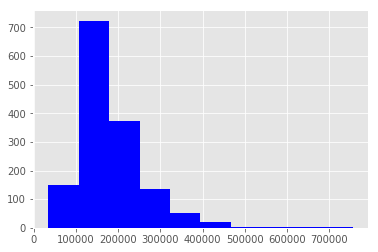

In [43]:
plt.hist(train['SalePrice'], color='blue')
plt.show()

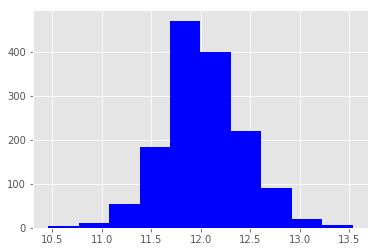

In [44]:
target = np.log(train['SalePrice'])
plt.hist(target, color='blue')
plt.show()

In [45]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [46]:
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [47]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

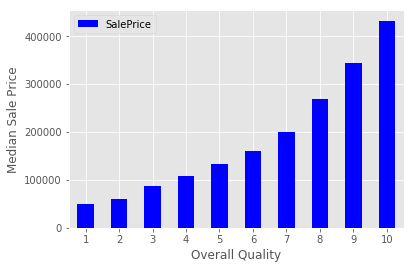

In [48]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

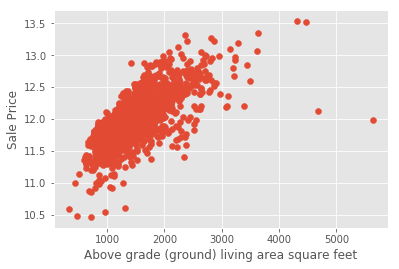

In [49]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

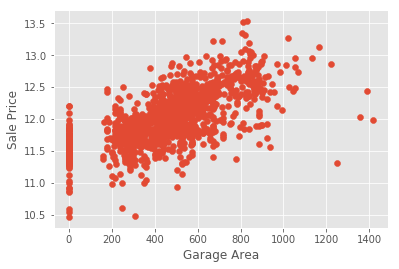

In [50]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

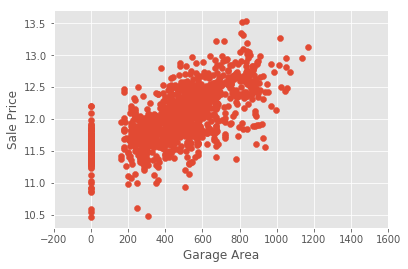

In [51]:
train = train[train['GarageArea'] < 1200]

plt.scatter(x=train['GarageArea'], y=np.log(train['SalePrice']))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [52]:
missing = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
missing.columns = ['missing']
missing.index.name = 'Feature'
missing

,missing
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [53]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [54]:
print(train['Street'].value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [55]:
train['Street'] = pd.get_dummies(train['Street'], drop_first=True)
holdout['Street'] = pd.get_dummies(train['Street'], drop_first=True)
print(train['Street'].value_counts())

1    1450
0       5
Name: Street, dtype: int64


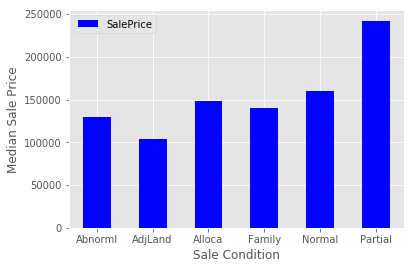

In [56]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [58]:
def encode(x): return 1 if x == 'Partial' else 0


train['SaleCondition'] = train['SaleCondition'].apply(encode)
holdout['SaleCondition'] = holdout['SaleCondition'].apply(encode)

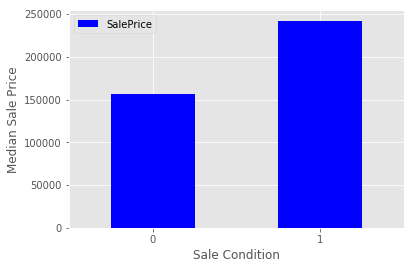

In [59]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [61]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

## Modeling

In [65]:
y = np.log(train['SalePrice'])
X = data.drop(['SalePrice', 'Id'], axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=.2)

In [72]:
lr = LinearRegression()
lm = lr.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [73]:
print('R^2 = {}'.format(lm.score(X_test, y_test)))
print('RMSE = {}'.format(mean_squared_error(y_test, predictions)))

R^2 = 0.8159124435338586
RMSE = 0.027401436947872435


## Submission

In [78]:
features = holdout.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = lm.predict(features)
predictions = np.exp(predictions) # to revert log() do exp()

submission = pd.DataFrame({'Id': holdout['Id'], 'SalePrice': predictions})
submission.head()

,Id,SalePrice
0,1461,125527.608703
1,1462,151450.356487
2,1463,173483.495170
3,1464,196598.052230
4,1465,178737.620291


In [79]:
submission.to_csv('submission_v1.csv', index=False)